# Run the baseline AMT model on example pieces

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from inference_main import prepare_model_elements, transcribe_audio
from hyperparameters import MODEL_TYPE_BASELINE

In [2]:
# audio_name = "MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.wav"
# audio_name = "MIDI-Unprocessed_SMF_13_01_2004_01-05_ORIG_MID--AUDIO_13_R1_2004_10_Track10_wav.wav"
# audio_name = "MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MID--AUDIO_14_R1_2004_06_Track06_wav.wav"
# audio_name = "MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav.wav"
audio_name = "MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID--AUDIO_20_R2_2004_12_Track12_wav--1.wav"
audio_path = os.path.join("data","synth", "2004", audio_name)
# audio_path = os.path.join("data","synth", "all_notes_synth.wav")

SEGMENT_WITH_GT = False
GT_ACOUSTIC  = False
NO_TRANSITION = True
NO_HMM = True
GT_SMOOTHING = False

cisoid_dict, transduction_nn, note_transition_dict = prepare_model_elements(MODEL_TYPE_BASELINE, verbose = True)
est_piano_roll = transcribe_audio(audio_path, MODEL_TYPE_BASELINE, cisoid_dict, transduction_nn, note_transition_dict, 
    segment_with_gt = SEGMENT_WITH_GT, gt_acoustic = GT_ACOUSTIC, no_transition = NO_TRANSITION, no_hmm = NO_HMM, gt_smoothing = GT_SMOOTHING, 
    verbose = True
)

Preparation: loading template audio and creating cisoid dictionary...
Preparation: loading transmit probability estimation NN in the transduction model...
Preparation: loading note transition dict in the transduction model...
-= Step 0: Reading audio =-
-= Step 1: Running onset-offset segmentation =-
num segments = 1970
-= Step 2: Running acoustic model =-
-= Step 3: No transduction model, thresholding the results =-


In [3]:
est_piano_roll.shape

(128995, 88)

0.3835294117647059 0.8109452736318408 0.5207667731629393


Text(0.5, 1.0, 'estimated velocity piano roll')

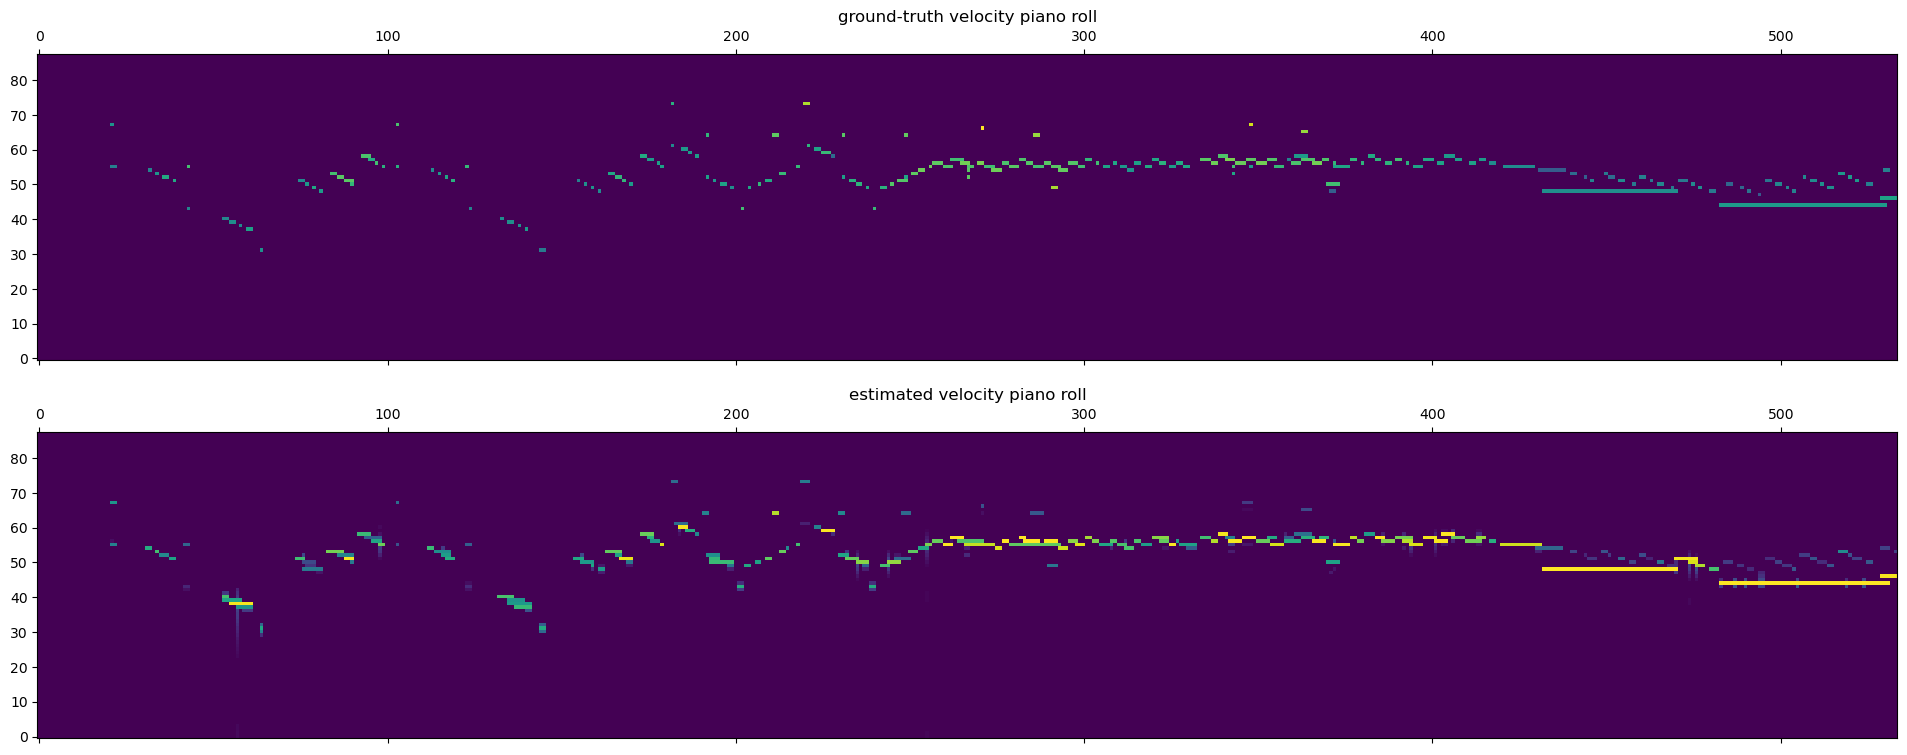

In [4]:
from data.data_utils import maestro_piano_roll_to_note_list, decompose_note_list, maestro_read_midi_to_piano_roll
from evaluate_main import calculate_transcription_note_metric_piano_roll

piece_name =  audio_name[:-4]
midi_dir = os.path.join("data","midi_no_cc","2004")
midi_path = os.path.join(midi_dir, piece_name+".midi")

eval_id_start = 0
eval_id_end = 16000

gt_piano_roll, tick_per_sec = maestro_read_midi_to_piano_roll(midi_path, pitch_range = 88, lowest_pitch = 21, min_len = 20)
precision, recall, F1 = calculate_transcription_note_metric_piano_roll(gt_piano_roll[eval_id_start:eval_id_end], est_piano_roll[eval_id_start:eval_id_end], 
    onset_tolerance = 0.05, pitch_tolerance=50.0, offset_ratio=0.2, offset_min_tolerance=0.05, strict=False, beta=1.0, plot = False
)

print(precision, recall, F1)

fig, ax = plt.subplots(2,1, figsize=(24,9))
ax[0].matshow(gt_piano_roll[eval_id_start:eval_id_end:30,:].T, origin = "lower")
ax[0].set_title("ground-truth velocity piano roll")
ax[1].matshow(est_piano_roll[eval_id_start:eval_id_end:30,:].T, origin = "lower")
ax[1].set_title("estimated velocity piano roll")

# Run the baseline AMT model on the whole dataset

In [1]:
import os
from hyperparameters import MODEL_TYPE_BASELINE, test_pieces_2004
from evaluate_main import batch_AMT_with_eval

# default: set them to all False
SEGMENT_WITH_GT = True
GT_ACOUSTIC  = False
NO_TRANSITION = True
NO_HMM = False
GT_SMOOTHING = True

gt_midi_dir = os.path.join("data","midi_no_cc","2004")
audio_dir = os.path.join("data","synth","2004")

save_dir = os.path.join("results","baseline_2004")
# save_dir = os.path.join("results","baseline_2004_map_updated")
# save_dir = os.path.join("results","nuv_2004")
# save_dir = os.path.join("results","baseline_2004_gt_seg")
# save_dir = os.path.join("results","baseline_2004_no_transition")
# save_dir = os.path.join("results","baseline_2004_no_hmm")

batch_AMT_with_eval(audio_dir, save_dir, MODEL_TYPE_BASELINE, gt_midi_dir = gt_midi_dir, eval_piece_names = test_pieces_2004, 
    segment_with_gt = SEGMENT_WITH_GT, gt_acoustic = GT_ACOUSTIC, no_transition = NO_TRANSITION, no_hmm = NO_HMM, gt_smoothing = GT_SMOOTHING, 
    onset_tolerance = 0.05, pitch_tolerance=50.0, offset_ratio=0.2, # None or 0.2
    offset_min_tolerance=0.05, verbose = True
)

Preparation: loading template audio and creating cisoid dictionary...
Preparation: loading transmit probability estimation NN in the transduction model...
Preparation: loading note transition dict in the transduction model...
Groud-truth midi directory detected. Evaluate model switched on.
Transcription 0: MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav...
Transcription eval result (P,R,F1): (0.9683098591549296, 0.870253164556962, 0.9166666666666666)
Transcription 1: MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_10_Track10_wav...
Transcription eval result (P,R,F1): (0.9502522177770047, 0.8627605811749842, 0.904395331512292)
Transcription 2: MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID--AUDIO_20_R2_2004_12_Track12_wav--1...
Transcription eval result (P,R,F1): (0.9837486457204767, 0.9608465608465608, 0.9721627408993576)
Transcription 3: MIDI-Unprocessed_XP_03_R1_2004_01-02_ORIG_MID--AUDIO_03_R1_2004_01_Track01_wav...
Transcription eval